# Importing packages


In [ ]:
# Pandas provides data structures like DataFrame and Series that allow easy handling of data.
import pandas as pd

# For numerical Calculations
import numpy as np

# EDA imports
# Libraries for data visualization.
import matplotlib.pyplot as plt # Matplotlib is the basic plotting library
import seaborn as sns           # Seaborn provides higher-level and aesthetically pleasing visualizations.

# It contains a wide range of algorithms for classification, regression, clustering, dimensionality reduction, etc.
# Used for model building, data processing, 
import sklearn

# Some functions of sklearn module

# It scales the features to have a mean of 0 and a standard deviation of 1.
from sklearn.preprocessing import StandardScaler

# A function to split the dataset into training and testing sets. 
# It's essential for evaluating model performance on unseen data.
from sklearn.model_selection import train_test_split

# A classification algorithm used for binary and multi-class classification tasks.
from sklearn.linear_model import LogisticRegression

# An ensemble learning method used for classification tasks. It builds multiple decision trees and combines their predictions to improve accuracy.
from sklearn.ensemble import RandomForestClassifier

# Metrics for evaluating model performance. Accuracy measures the proportion of correct predictions, while precision and recall are useful for imbalanced datasets.
from sklearn.metrics import accuracy_score, precision_score, recall_score


# Load the dataset into data


In [2]:
# Import Titanic dataset
titanic_data = pd.read_csv("titanic.csv")

# Dataset overview and statistical summary


In [3]:
# Statistical summary for Titanic dataset
titanic_data.info()
titanic_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1000 non-null   int64  
 1   Survived     1000 non-null   int64  
 2   Pclass       1000 non-null   int64  
 3   Name         1000 non-null   object 
 4   Sex          1000 non-null   object 
 5   Age          823 non-null    float64
 6   SibSp        1000 non-null   int64  
 7   Parch        1000 non-null   int64  
 8   Ticket       1000 non-null   object 
 9   Fare         1000 non-null   float64
 10  Cabin        299 non-null    object 
 11  Embarked     998 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1000.000000,1000.000000,1000.000000,823.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.404000,2.274000,30.177606,0.716000,0.571000,56.732249
std,288.819436,0.490943,0.840018,15.138305,1.312656,1.046926,98.014902
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,250.750000,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000
50%,500.500000,0.000000,3.000000,29.000000,0.000000,0.000000,17.600000
75%,750.250000,1.000000,3.000000,39.500000,1.000000,1.000000,52.000000
max,1000.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


0    596
1    404
Name: Survived, dtype: int64


3    527
1    253
2    220
Name: Pclass, dtype: int64


male      632
female    368
Name: Sex, dtype: int64


S    684
C    204
Q    110
Name: Embarked, dtype: int64




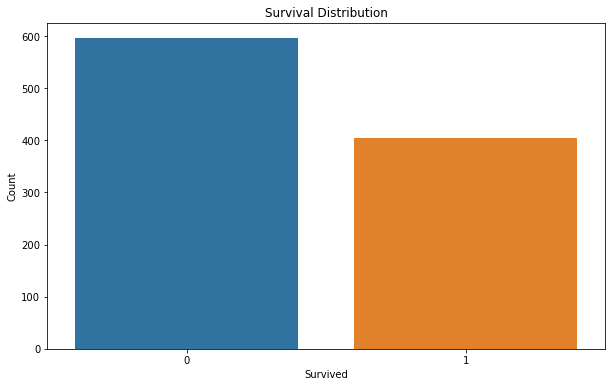

Embarked   C   Q    S
Pclass               
1         96  13  142
2         27  15  178
3         81  82  364


In [4]:
# Categorical variable analysis

# Select the categorical columns for analysis
categorical_columns = ['Survived', 'Pclass', 'Sex', 'Embarked']

# Perform frequency count for each categorical column
for column in categorical_columns:
    print(titanic_data[column].value_counts())
    print('\n')

# Visualize the distribution of a categorical column using a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=titanic_data)
plt.title('Survival Distribution')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Create a cross-tabulation (crosstab) of two categorical variables
cross_tab = pd.crosstab(titanic_data['Pclass'], titanic_data['Embarked'])
print(cross_tab)

# Data cleaning

In [5]:
# Drop unnecessary columns
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
titanic_data.drop(columns_to_drop, axis=1, inplace=True)

# Handle missing values
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Convert categorical variables to appropriate data types
titanic_data['Survived'] = titanic_data['Survived'].astype('category')
titanic_data['Pclass'] = titanic_data['Pclass'].astype('category')
titanic_data['Sex'] = titanic_data['Sex'].astype('category')
titanic_data['Embarked'] = titanic_data['Embarked'].astype('category')

In [6]:
# Verify the cleaned dataset
print(titanic_data.head())

  Survived Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0        0      3    male  22.0      1      0   7.2500        S
1        1      1  female  38.0      1      0  71.2833        C
2        1      3  female  26.0      0      0   7.9250        S
3        1      1  female  35.0      1      0  53.1000        S
4        0      3    male  35.0      0      0   8.0500        S


# EDA

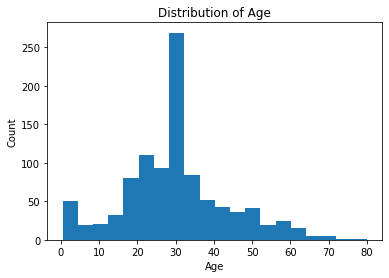

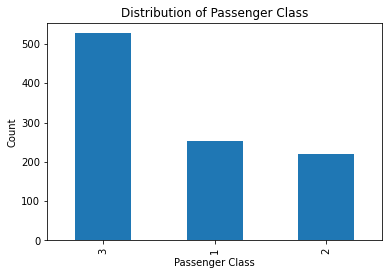

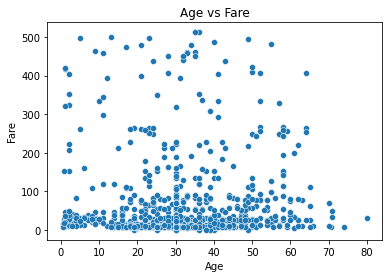

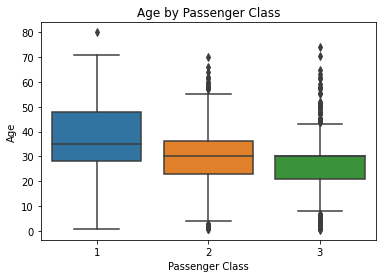

In [7]:
# Histogram of Age
plt.hist(titanic_data['Age'].dropna(), bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

# Bar plot of Passenger Class
titanic_data['Pclass'].value_counts().plot(kind='bar')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Distribution of Passenger Class')
plt.show()

# Relationship between variables

# Scatter plot of Age vs Fare
sns.scatterplot(x='Age', y='Fare', data=titanic_data)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare')
plt.show()

# Box plot of Age by Passenger Class
sns.boxplot(x='Pclass', y='Age', data=titanic_data)
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.title('Age by Passenger Class')
plt.show()

In [8]:
# Insights and summary of the titanic dataset

# Summary statistics of numeric variables
print(titanic_data.describe())

# Cross-tabulation of variables
cross_tab = pd.crosstab(titanic_data['Sex'], titanic_data['Survived'])
print(cross_tab)


               Age        SibSp        Parch         Fare
count  1000.000000  1000.000000  1000.000000  1000.000000
mean     30.177606     0.716000     0.571000    56.732249
std      13.731893     1.312656     1.046926    98.014902
min       0.420000     0.000000     0.000000     0.000000
25%      22.000000     0.000000     0.000000     8.050000
50%      30.177606     0.000000     0.000000    17.600000
75%      36.000000     1.000000     1.000000    52.000000
max      80.000000     8.000000     6.000000   512.329200
Survived    0    1
Sex               
female    104  264
male      492  140


## NOTE - To specify why I chose to import and do some things again later.

When I started the project, I wanted to divide everything into two parts so that I could manage my time better as well as give the project the time it needed. I had done everything above this note as one part and below as another part. When I completed the first part and wanted to start the second, it gave me a lot of errors which were solved by importing things and doing some of the things again which maybe due to my lack of knowledge of how jupyter notebooks works. I have followed everything else in the same order and documented everything too. I am sorry for any inconvenience. 

Thank you 

# Data Processing and normalization

In [9]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Load the Titanic dataset
titanic_data = pd.read_csv("titanic.csv")

# Drop unnecessary columns
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
titanic_data.drop(columns_to_drop, axis=1, inplace=True)

# Handle missing values
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Convert categorical variables to appropriate data types
categorical_columns = ['Survived', 'Pclass', 'Sex', 'Embarked']
for column in categorical_columns:
    titanic_data[column] = titanic_data[column].astype('category')

# Split the dataset into features and target variable
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

# Perform one-hot encoding of categorical variables
X_encoded = pd.get_dummies(X)

# Normalize numerical variables
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_encoded)


# Creating ML model 1

In [10]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

LogisticRegression()

## Prediction on Test data

In [11]:
# Make predictions on the test data using the logistic regression model
logreg_predictions = logreg_model.predict(X_test)


## Model 1 Performance

In [12]:
# Evaluate the performance of the logistic regression model
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
logreg_precision = precision_score(y_test, logreg_predictions, average='weighted')
logreg_recall = recall_score(y_test, logreg_predictions, average='weighted')

# Print the performance metrics of the logistic regression model
print("Logistic Regression Model:")
print("Accuracy:", logreg_accuracy)
print("Precision:", logreg_precision)
print("Recall:", logreg_recall)


Logistic Regression Model:
Accuracy: 0.775
Precision: 0.7741404923599322
Recall: 0.775


# Creating ML model 2

In [13]:
# Create and train the random forest classifier model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


RandomForestClassifier()

## Prediction on Test data

In [14]:
# Make predictions on the test data using the random forest classifier model
rf_predictions = rf_model.predict(X_test)


## ## Model 2 Performance

In [15]:
# Evaluate the performance of the random forest classifier model
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')

# Print the performance metrics of the random forest classifier model
print("\nRandom Forest Classifier Model:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)



Random Forest Classifier Model:
Accuracy: 0.735
Precision: 0.733986151302191
Recall: 0.735


# Report and insight from your analysis

The Titanic dataset analysis focuses on predicting the survival of passengers based on various features such as passenger class, gender, age, and fare. Two machine learning models, Logistic Regression and Random Forest Classifier, were trained and evaluated to predict passenger survival.

### Exploratory Data Analysis (EDA):
- Age Distribution: The histogram shows the distribution of passengers' ages, with a majority falling between 20 and 40 years.
- Passenger Class: The bar plot illustrates the distribution of passengers across different classes, with Class 3 having the highest count.
- Age vs. Fare: The scatter plot visualizes the relationship between age and fare paid by passengers, indicating a varied distribution with no clear trend.
- Age by Passenger Class: The box plot reveals the distribution of ages within different passenger classes, highlighting potential differences in age groups.

### Insights:
1. Logistic Regression Model Performance:
   - Accuracy: The logistic regression model achieved an accuracy of 0.775, indicating that it correctly predicted passenger survival in 77.5% of cases.
   - Precision: The precision score of 0.774 suggests that the model has a good ability to correctly identify both survived and non-survived passengers.
   - Recall: The recall score of 0.775 indicates that the model effectively captured 77.5% of the actual survived passengers.
  
2. Random Forest Classifier Model Performance:
   - Accuracy: The random forest classifier achieved an accuracy of 0.735, slightly lower than the logistic regression model.
   - Precision: The precision score of 0.734 suggests that the model has a good ability to correctly identify both survived and non-survived passengers.
   - Recall: The recall score of 0.735 indicates that the model effectively captured 73.5% of the actual survived passengers.

Both models performed reasonably well in predicting passenger survival, with the logistic regression model slightly outperforming the random forest classifier in terms of accuracy.

It's important to note that the dataset had missing values in the 'Age' and 'Embarked' columns, which were handled by imputing the mean age and the mode of the 'Embarked' column, respectively.

Further analysis and feature engineering may enhance the models' predictive capabilities. Additionally, considering additional variables, such as cabin information and exploring feature interactions, could potentially improve the accuracy of the predictions.
